# 확률론과 정보이론

------
### 박스 11개 만들기
* 0 번부터 10번까지 번호가 붙은 박스를 만든다
* 각 상자에는 10개의 카드가 있다
* 번호가 *i* 인 상자에는 Red 색 카드가 *i* 개 들어 있다

In [3]:
boxes = {i:['R']*i + ['B'] * (10-i) for i in range(11)}
boxes

{0: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 1: ['R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 2: ['R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 3: ['R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 4: ['R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B'],
 5: ['R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B'],
 6: ['R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B'],
 7: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B'],
 8: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B'],
 9: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B'],
 10: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']}

* 이쁘게 출력해 보기

In [4]:
from termcolor import colored

color = {'R':colored('♠', 'red'), 'B':colored('♠', 'blue')}
pp = lambda cards: ' '.join([color[c] for c in cards])

for i, box in boxes.items():
    print(f'{i:2}: ', pp(box))

 0:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 1:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 2:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 3:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 4:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 5:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 6:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 7:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 8:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
 9:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
10:  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠


------
### 딜러 
* 박스를 하나 고른다
* 고른 박스에서 카드를 복원 추출 방식으로 *n*번 꺼내어 보여준다. 
  * 복원 추출: 꺼낸 카드를 다시 넣고 다음 카드를 꺼낸다는 의미

In [5]:
import random

def 딜러(박스번호):
    박스 = boxes[박스번호]
    추출 = lambda: random.choice(박스)
    n번추출 = lambda n: [추출() for _ in range(n)]
    return n번추출

In [6]:
d5 = 딜러(박스번호=5)

print(pp(d5(n=8)))
print(pp(d5(n=4)))
print(pp(d5(n=6)))

♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
♠ ♠ ♠ ♠
♠ ♠ ♠ ♠ ♠ ♠


In [7]:
d3 = 딜러(박스번호=3)
print(pp(d3(10)))
print(pp(d3(10)))

♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠


------
### 딜러 박스번호 예측하기 
* 딜러가 복원추출한 10장의 카드만 관찰한 후  
* 딜러가 몇 번째 박스를 가지고 있는지 예측해 보자

In [8]:
def 딜러의_박스번호_예측하기(cards):
    assert len(cards) == 10
    빨간카드갯수 = len([c for c in cards if c == 'R'])
    박스번호 = 0
    ''' 여기를 구현하시오'''
    return 박스번호 

In [9]:
cards = d5(n=10) 
print(pp(cards))

♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠


In [10]:
예측_박스번호 = 딜러의_박스번호_예측하기(cards)
print('예측_박스번호:', 예측_박스번호)

예측_박스번호: 0


In [11]:
def 예측_테스트(예측함수, 테스트_횟수):
    박스번호들 = [random.randint(0,10) for _ in range(테스트_횟수)]
    딜러들 = [딜러(b) for b in 박스번호들]
    카드들 = [d(n=10) for d in 딜러들]
    예측들 = [예측함수(c10) for c10 in 카드들]
    equals = sum([1 for p, b in zip(예측들, 박스번호들) if p == b])
    return equals/테스트_횟수

예측_테스트(딜러의_박스번호_예측하기, 테스트_횟수=1000)

0.087

------
### 딜러가 추출하는 카드의 분포를 살펴보자


In [12]:
import matplotlib.pyplot as plt

def show_red_dist(box_number):
    d3 = 딜러(box_number)
    cards = [d3(n=10) for _ in range(100000)]
    num_red = [c.count('R') for c in cards]
    histogram = [num_red.count(n)/len(cards) for n in range(11)] 
    plt.bar([f'r#{i}' for i in range(11)], histogram)
    plt.show()

상자안의 red 카드 개수(0):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


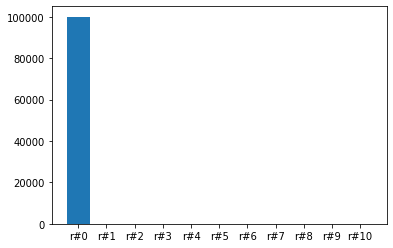




상자안의 red 카드 개수(1):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


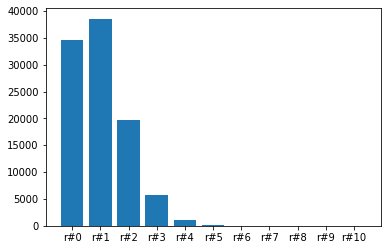




상자안의 red 카드 개수(2):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


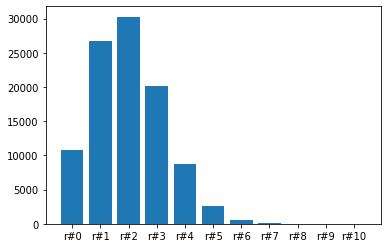




상자안의 red 카드 개수(3):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


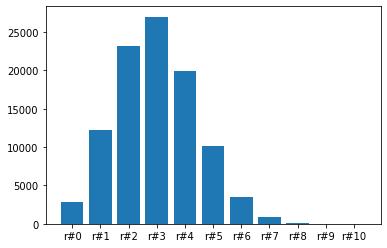




상자안의 red 카드 개수(4):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


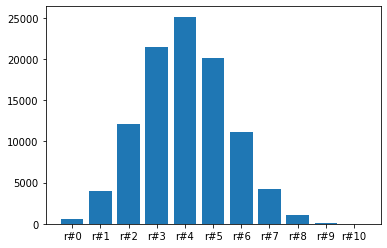




상자안의 red 카드 개수(5):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


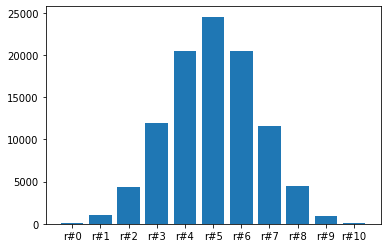




상자안의 red 카드 개수(6):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


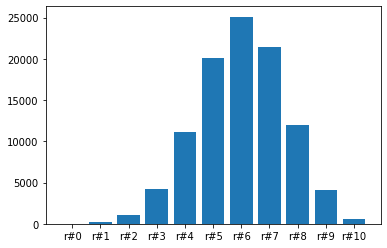




상자안의 red 카드 개수(7):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


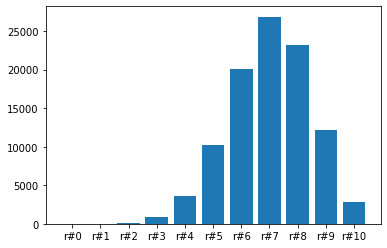




상자안의 red 카드 개수(8):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


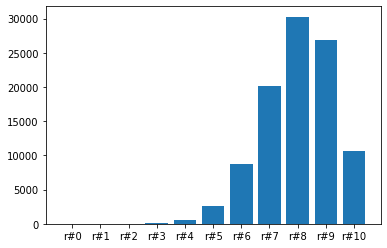




상자안의 red 카드 개수(9):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


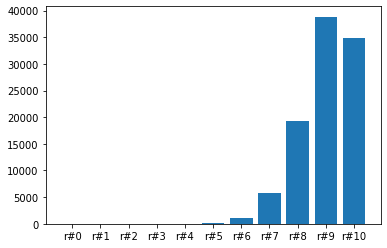




상자안의 red 카드 개수(10):  ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠
해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값


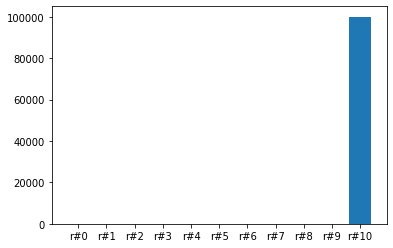

In [13]:
from tqdm.notebook import tqdm

for i in tqdm(range(11)):
    print(f'상자안의 red 카드 개수({i}): ', pp(boxes[i]))
    print('해당 상자에서 10개의 카드를 복원추출 했을 때의 red 카드 갯수별 기댓값')
    show_red_dist(i)
    print('\n\n')

------
### ■ 숙제: 딜러가 다음에 꺼낼 카드 예측하기
* 딜러가 복원추출한 10장의 카드만 관찰한 후  
* 딜러가 꺼낼 다음번 카드를 예측해 보자

In [14]:
def 다음에_꺼낼_카드_예측하기(cards):
    assert len(cards) == 10
    빨간카드갯수 = len([c for c in cards if c == 'R'])
    박스번호예측값 = 딜러의_박스번호_예측하기(cards)
    다음카드 = 'R'
    ''' 여기를 구현하시오'''
    return 다음카드 

In [16]:
cards = d5(n=10) 
print(pp(cards))

다음에_꺼낼_카드_예측하기(cards)

♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠ ♠


'R'

In [18]:
def 예측_테스트_2(예측함수, 테스트_횟수):
    박스번호들 = [random.randint(0,10) for _ in range(테스트_횟수)]
    딜러들 = [딜러(b) for b in 박스번호들]
    카드들 = [d(n=10) for d in 딜러들]
    예측들 = [예측함수(c10[:10]) for c10 in 카드들]
    그다음카드들 = [d(n=1)[0] for d in 딜러들]
    equals = sum([1 for p, b in zip(예측들, 그다음카드들) if p == b])
    return equals/테스트_횟수

예측_테스트(다음에_꺼낼_카드_예측, 테스트_횟수=1000)

0.478